# Mixture density network sklearn compatible

In [10]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


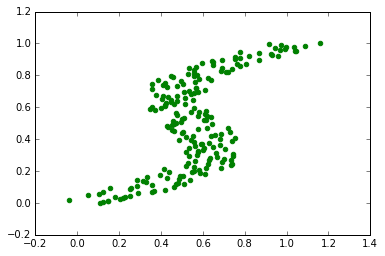

In [11]:
# generate some 1D regression data (reproducing Bishop book data, page 273). 
# Note that the P(y|x) is not a nice distribution.
# E.g. it has three modes for x ~= 0.5
N = 200
X = np.linspace(0,1,N)
Y = X + 0.3 * np.sin(2*3.1415926*X) + np.random.uniform(-0.1, 0.2, N)
X,Y = Y,X
X = X.reshape(-1,1)
Y = Y.reshape( (1, len(Y)))
plt.scatter(X,Y,color='g')

In [12]:
X.shape, Y.shape

((200, 1), (1, 200))

In [112]:
import mixture_density_network_kar
from mixture_density_network_kar import MDNRegressor as MDNRegressorK
from sklearn import neural_network

In [113]:
from sklearn.metrics import mean_squared_error

def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5

metric = RMSE
metric_score = sklearn.metrics.scorer.make_scorer(score_func=RMSE, greater_is_better=False)

### MDN regressor

In [125]:
mdn = MDNRegressorK(hidden_layer_size=10)

In [126]:
mdn.fit(X,Y)

hidden size: 10
input size: 1
K (num components): 5
X shape: (1, 200)
y  shape: (1, 200)
epoch:  0 loss:  1.08115396454
epoch:  1000 loss:  -0.419616426513
epoch:  2000 loss:  -0.47643612421
epoch:  3000 loss:  -0.533414080179
epoch:  4000 loss:  -0.590552538551
epoch:  5000 loss:  -0.629840800276
epoch:  6000 loss:  -0.650870490565
epoch:  7000 loss:  -0.66842907595
epoch:  8000 loss:  -0.682584193925
epoch:  9000 loss:  -0.693625371705
epoch:  10000 loss:  -0.702066856771
epoch:  11000 loss:  -0.708559358056
epoch:  12000 loss:  -0.713650063042
epoch:  13000 loss:  -0.717717529017
epoch:  14000 loss:  -0.720979987471
epoch:  15000 loss:  -0.723570836185
epoch:  16000 loss:  -0.725610508653
epoch:  17000 loss:  -0.727232305328
epoch:  18000 loss:  -0.728566370323
epoch:  19000 loss:  -0.729752207486


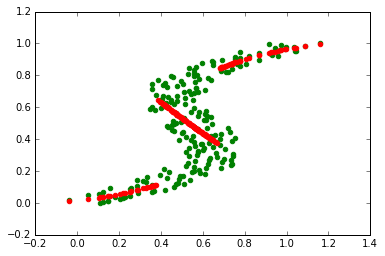

In [127]:
y_hat = mdn.predict(X)
plt.scatter(X,Y,color='g')
plt.scatter(X,y_hat,color='r')

#### Grid search for the MDN

In [152]:
mdn = MDNRegressorK(hidden_layer_size=10)
param_grid_ = {"hidden_layer_size":[10,20,30,40,50,60]}

grid_mdn = sklearn.model_selection.GridSearchCV(estimator=mdn,
                                                param_grid=param_grid_,
                                                scoring=metric_score,
                                                verbose=1,
                                                n_jobs=1)

In [153]:
grid_mdn.fit(X,Y.flatten())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MDNRegressor(activation='tanh', batch_size='auto', hidden_layer_size=10,
       n_components=5, n_epochs=20000, shuffle=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_size': [10, 20, 30, 40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=1)

#### Evaluation in the test set

In [178]:
RMSE(grid_mdn.predict(X),Y.flatten())

0.25292845700320388

#### About the grid

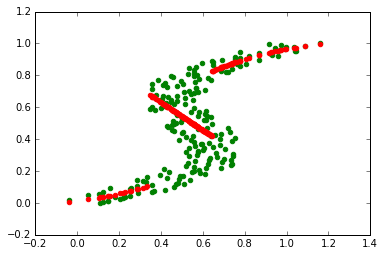

In [173]:
y_hat = grid_mdn.predict(X)
plt.scatter(X,Y,color='g')
plt.scatter(X,y_hat,color='r')

In [170]:
grid_mdn.cv_results_['mean_train_score']

array([-0.2431538 , -0.24812848, -0.23409769, -0.23928934, -0.24374477,
       -0.23988018])

In [161]:
grid_mdn.cv_results_['mean_test_score']

array([-0.52277026, -0.53948495, -0.46123871, -0.53110893, -0.50725318,
       -0.4626711 ])

In [163]:
grid_mdn.cv_results_['params']

({'hidden_layer_size': 10},
 {'hidden_layer_size': 20},
 {'hidden_layer_size': 30},
 {'hidden_layer_size': 40},
 {'hidden_layer_size': 50},
 {'hidden_layer_size': 60})

### MLP regression

In [ ]:
mlp = sklearn.neural_network.multilayer_perceptron.MLPRegressor(max_iter=10000)
param_grid = {"hidden_layer_sizes":[[5],[10],[100],[200],[500]]}
grid_mlp = sklearn.model_selection.GridSearchCV(estimator=mlp,
                                                param_grid=param_grid,
                                                scoring=metric_score)

In [98]:
grid_mlp = sklearn.model_selection.GridSearchCV(estimator=mlp,
                                                param_grid=param_grid,
                                                scoring=metric_score)

In [99]:
grid_mlp.fit(X,Y.flatten())

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [[5], [10], [100], [200], [500]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=0)

In [165]:
grid_mlp.cv_results_['mean_train_score']

array([-0.28993252, -0.23282349, -0.20213422, -0.22330391, -0.22932218])

In [167]:
grid_mlp.cv_results_['mean_test_score']

array([-0.46475806, -0.41690698, -0.34841426, -0.34450496, -0.34348444])

In [168]:
grid_mlp.cv_results_['params']

({'hidden_layer_sizes': [5]},
 {'hidden_layer_sizes': [10]},
 {'hidden_layer_sizes': [100]},
 {'hidden_layer_sizes': [200]},
 {'hidden_layer_sizes': [500]})

In [103]:
grid_mlp.best_estimator_

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[500], learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

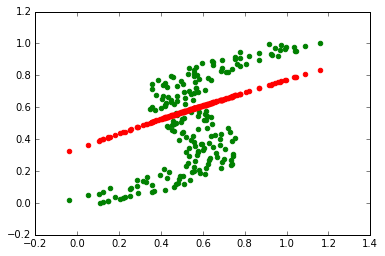

In [169]:
y_hat = grid_mlp.predict(X)
plt.scatter(X,Y,color='g')
plt.scatter(X,y_hat,color='r')

In [179]:
RMSE(grid_mlp.predict(X),Y.flatten())

0.26179685827504084

## California housing dataset

In [184]:
import sklearn
from sklearn import datasets

In [189]:
data = datasets.california_housing.fetch_california_housing()

In [194]:
X = data["data"]
y = data["target"]

In [195]:
X.shape, y.shape

((20640, 8), (20640,))

In [201]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### mdn grid

In [223]:
mdn = MDNRegressorK(hidden_layer_size=10, verbose=4)
param_grid_ = {"hidden_layer_size":[20] , "n_components":[10,50]}

grid_mdn = sklearn.model_selection.GridSearchCV(estimator=mdn,
                                                param_grid=param_grid_,
                                                scoring=metric_score,
                                                verbose=1,
                                                n_jobs=1)

In [216]:
mdn.fit(X_train, y_train)

epoch:  0 loss:  3.30279894095
epoch:  1000 loss:  1.41249180009
epoch:  2000 loss:  1.17186594482


In [224]:
grid_mdn.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
epoch:  0 loss:  3.14143477799
epoch:  1000 loss:  1.19532519352
epoch:  2000 loss:  1.02447947202
epoch:  3000 loss:  0.888454568897
epoch:  4000 loss:  0.802745828856
epoch:  0 loss:  3.65357247004
epoch:  1000 loss:  1.26379656052
epoch:  2000 loss:  1.08454870269
epoch:  3000 loss:  1.02708036378
epoch:  4000 loss:  0.993207867588
epoch:  0 loss:  3.18112586409
epoch:  1000 loss:  1.17517235952
epoch:  2000 loss:  0.906533863114
epoch:  3000 loss:  0.842363332169
epoch:  4000 loss:  0.790858028929
epoch:  0 loss:  2.82559741285
epoch:  1000 loss:  1.20422883476
epoch:  2000 loss:  1.24028519313
epoch:  3000 loss:  1.16570913853
epoch:  4000 loss:  1.15327406626
epoch:  0 loss:  2.89712752331
epoch:  1000 loss:  1.13452504421
epoch:  2000 loss:  0.967928503088
epoch:  3000 loss:  0.900331666916
epoch:  4000 loss:  0.872218750638
epoch:  0 loss:  2.87335416148
epoch:  1000 loss:  1.19752107261
epoch:  2000 loss:  1.1761991961

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 36.6min finished


epoch:  0 loss:  2.99813644446
epoch:  1000 loss:  1.15572042303
epoch:  2000 loss:  0.925812092383
epoch:  3000 loss:  0.853963579165
epoch:  4000 loss:  0.800468477233


GridSearchCV(cv=None, error_score='raise',
       estimator=MDNRegressor(activation='tanh', batch_size='auto', hidden_layer_size=10,
       n_components=5, n_epochs=5000, shuffle=True, verbose=4),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_components': [10, 50], 'hidden_layer_size': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=1)

In [225]:
RMSE(grid_mdn.predict(X_test),y_test)

0.74837082873406824

#### mlp grid

In [220]:
mlp = sklearn.neural_network.multilayer_perceptron.MLPRegressor(max_iter=10000)
param_grid = {"hidden_layer_sizes":[[10],[20],[100]]}
grid_mlp = sklearn.model_selection.GridSearchCV(estimator=mlp,
                                                param_grid=param_grid,
                                                scoring=metric_score)

In [221]:
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [[10], [20], [100]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=0)

In [222]:
RMSE(grid_mlp.predict(X_test),y_test)

0.83113625762575949